In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyClassifier

In [39]:
df = pd.read_csv('diabetes.csv')

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<Figure size 400x400 with 0 Axes>

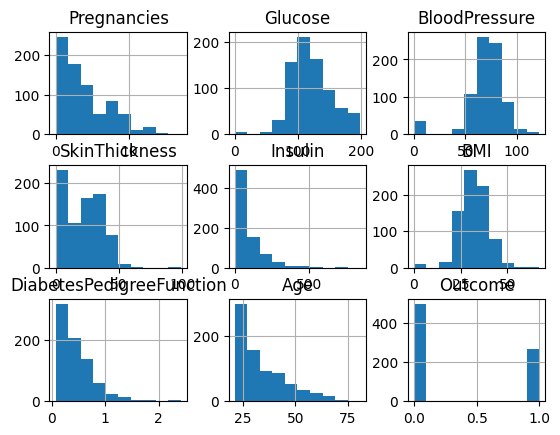

In [43]:
plt.figure(figsize=(4,4))
df.hist()
plt.show();

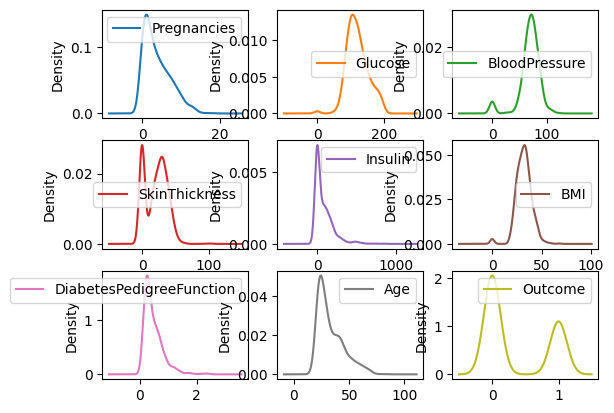

In [44]:
df.plot(kind = 'density', subplots = True, layout =(3,3), sharex = False)
plt.show();

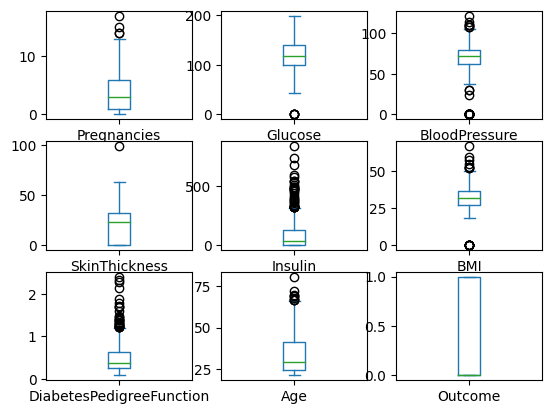

In [45]:
df.plot(kind = 'box', subplots = True, layout =(3,3), sharex = False)
plt.show();

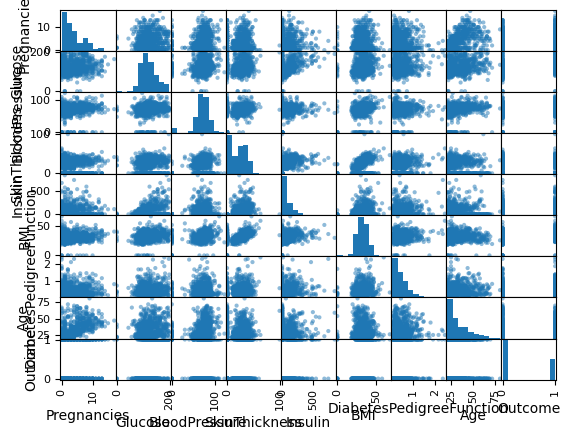

In [68]:
scatter_matrix(df)
plt.show();

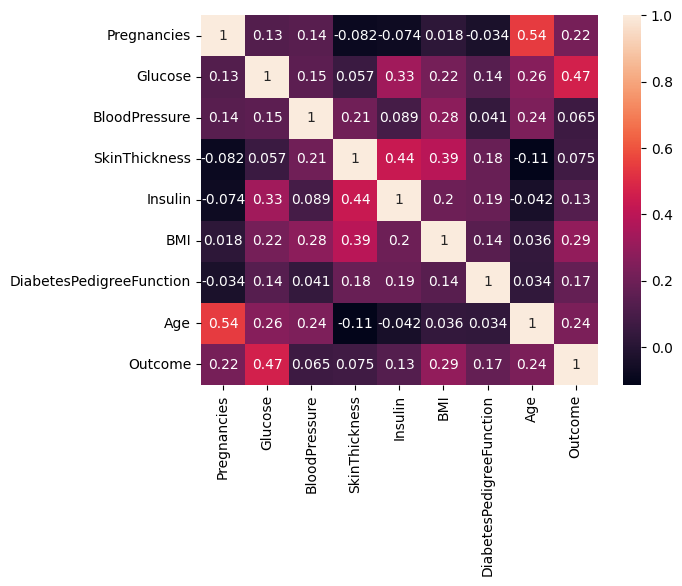

In [46]:
sns.heatmap(data=df.corr(), annot= True)
plt.show();

In [47]:
target = 'Outcome'
y = df[target]
x = df.drop(target, axis= 1)

In [48]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.60,0.63,50
1,1,85,66,29,0,26.60,0.35,31
2,8,183,64,0,0,23.30,0.67,32
3,1,89,66,23,94,28.10,0.17,21
4,0,137,40,35,168,43.10,2.29,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63
764,2,122,70,27,0,36.80,0.34,27
765,5,121,72,23,112,26.20,0.24,30
766,1,126,60,0,0,30.10,0.35,47


In [49]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [51]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [52]:
preprocess = ColumnTransformer(transformers=[
    ('num_feature', num_transformer, ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
])

In [53]:

cls = Pipeline(steps=[
    ("preprocess", preprocess), 
    ('model', SVC())
])


In [54]:
param_grid = {
    'model__C': [1, 2, 3],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    "preprocess__num_feature__imputer__strategy": ['mean', 'median']
}

In [55]:

cls_cv = GridSearchCV(cls, param_grid, verbose= 1, n_jobs=4, scoring="accuracy",cv = 6)

In [56]:
cls_cv

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_feature',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pregnancies',
                                                                          'Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age'])])),
                                       ('model', SVC())]),
             n_jobs=4,
             param_grid={'model__C': [1, 2, 3],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'preprocess__num_feature__imputer__strategy': ['mean',
                                                                        'median']},
             scoring='accuracy', verbose=1)

In [57]:
cls_random = RandomizedSearchCV(cls, param_distributions= param_grid, scoring= 'accuracy', n_iter= 20 )

In [58]:
cls_random

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num_feature',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Pregnancies',
                                                                                'Glucose',
                                                                                'BloodPressure',
                                                                                'SkinThickness',
                                                                                'Insulin',
                                                                                'BMI',
                                                                                'DiabetesPedigreeFunction',
                                                                                'Age'])])),
                                             ('model', SVC())]),
                   n_iter=20,
                   param_distributions={'model__C': [1, 2, 3],
                                        'model__kernel': ['linear', 'poly',
                                                          'rbf', 'sigmoid'],
                                        'preprocess__num_feature__imputer__strategy': ['mean',
                                                                                       'median']},
                   scoring='accuracy')

In [59]:
cls_cv.fit(x_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_feature',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pregnancies',
                                                                          'Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age'])])),
                                       ('model', SVC())]),
             n_jobs=4,
             param_grid={'model__C': [1, 2, 3],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'preprocess__num_feature__imputer__strategy': ['mean',
                                                                        'median']},
             scoring='accuracy', verbose=1)

In [60]:
cls_random.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num_feature',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Pregnancies',
                                                                                'Glucose',
                                                                                'BloodPressure',
                                                                                'SkinThickness',
                                                                                'Insulin',
                                                                                'BMI',
                                                                                'DiabetesPedigreeFunction',
                                                                                'Age'])])),
                                             ('model', SVC())]),
                   n_iter=20,
                   param_distributions={'model__C': [1, 2, 3],
                                        'model__kernel': ['linear', 'poly',
                                                          'rbf', 'sigmoid'],
                                        'preprocess__num_feature__imputer__strategy': ['mean',
                                                                                       'median']},
                   scoring='accuracy')

In [61]:
cls.fit(x_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('model', SVC())])

In [62]:
pickle.dump(cls_cv, open('svc_model.pkl', 'wb'))

In [63]:
model = pickle.load(open('svc_model.pkl', 'rb'))

In [64]:
y_pred = model.predict(x_test)

In [65]:
print('confustion_matrix : ', confusion_matrix(y_test, y_pred)) 

confustion_matrix :  [[82 17]
 [24 31]]


In [66]:
print("classifier report : ", classification_report(y_test,y_pred))

classifier report :                precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [32]:
cls_lazy = Pipeline(steps=[
    ("preprocessor", preprocess)
])



In [33]:
x_train = cls_lazy.fit_transform(x_train)
x_test = cls_lazy.transform(x_test)


In [34]:
cls_lazy_models = LazyClassifier(verbose= 0, ignore_warnings= False, custom_metric= None)
models, predictions = cls_lazy_models.fit(x_train, x_test, y_train, y_test)

 31%|███       | 9/29 [00:00<00:00, 24.96it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 83%|████████▎ | 24/29 [00:00<00:00, 28.25it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:01<00:00, 16.74it/s]


In [35]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.78,0.76,0.76,0.78,0.02
GaussianNB,0.77,0.75,0.75,0.77,0.01
RidgeClassifierCV,0.77,0.75,0.75,0.77,0.01
DecisionTreeClassifier,0.75,0.74,0.74,0.75,0.01
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.02
RidgeClassifier,0.76,0.74,0.74,0.76,0.02
LinearSVC,0.75,0.74,0.74,0.75,0.03
LogisticRegression,0.75,0.74,0.74,0.75,0.02
CalibratedClassifierCV,0.75,0.73,0.73,0.75,0.09
